## Phase Three Project Submission 

##### Student Name: Millicent Cheptoi
##### Student Pace: Part-time 
##### Scheduled Project Submission Date: 20 / 12/ 2024 
##### Instructors name's :  Samuel Karu and  Daniel Ekale 
##### Blog Post URL: https://github.com/Cheptoi-Millicent/DS-PHASE3-PROJECT.git

## 1. Business UnderStanding

### Problem Statement

The objective of this project is to build a classifier that predicts whether a customer will "soon" stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem where the goal is to identify customers who are at risk of churn, i.e., customers who will leave the service in the near future. The model will help the company proactively identify high-risk customers and take actions to retain them.

### Business Objectives

* Churn Prediction: Identify the factors that are most likely to lead to customer churn.
  
* Customer Retention: Develop a model that can accurately predict which customers are at risk of churning.SyriaTel can take proactive steps to retain customers who are at risk of churning.
  
* Cost Reduction: Predicting churn allows SyriaTel to allocate resources effectively, targeting the customers who require intervention before they leave. This reduces the costs associated with acquiring new customers to replace those lost.
  
* Revenue Retention: Ultimately, reducing churn will contribute to higher customer lifetime value (CLV) and revenue retention, ensuring the long-term profitability and sustainability of SyriaTel.

### Success Metrics

The success criteria for this project include: 

* Developing a robust churn prediction model with high recall score of 0.8 

* Identifying the key features and factors that significantly contribute to customer churn. 

* Providing actionable insights and recommendations to the telecom company for reducing churn and improving customer retention. 

* Demonstrating the value of churn prediction models in enabling proactive retention strategies and reducing revenue losses due to customer churn. 

# 2. Data Understanding 

In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

#Previewing the first few rows
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Shape of the DataFrame 
print('The number of rows: {}'.format(data.shape[0]))
print("The number of columns: {}".format(data.shape[1]))

The number of rows: 3333
The number of columns: 21


In [4]:
# General statistics of numeric columns
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#General overview of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Numerical Columns
print(f"Numerical Columns: {data.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {data.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


Categorical Features:

* `state`: The state where the customer resides.
* `phone number`: The phone number of the customer.
* `international plan`: Whether the customer has an international plan (Yes or No).
* `voice mail plan`: Whether the customer has a voice mail plan (Yes or No).

Numeric Features:

* `area code`: The area code associated with the customer's phone number.
* `account length`: The number of days the customer has been an account holder.
* `number vmail messages`: The number of voice mail messages received by the customer.
* `total day minutes`: The total number of minutes the customer used during the day.
* `total day calls`: The total number of calls made by the customer during the day.
* `total day charge`: The total charges incurred by the customer for daytime usage.
* `total eve minutes`: The total number of minutes the customer used during the evening.
* `total eve calls`: The total number of calls made by the customer during the evening.
* `total eve charge`: The total charges incurred by the customer for evening usage.
* `total night minutes`: The total number of minutes the customer used during the night.
* `total night calls`: The total number of calls made by the customer during the night.
* `total night charge`: The total charges incurred by the customer for nighttime usage.
* `total intl minutes`: The total number of international minutes used by the customer.
* `total intl calls`: The total number of international calls made by the customer.
* `total intl charge`: The total charges incurred by the customer for international usage.
* `customer service calls`: The number of customer service calls made by the customer.

# 3. Data Preparation
In this phase, which is often referred to as “data munging: Preparing raw data for analysis and reporting”, we will perform data cleaning, conduct exploratory data analysis (EDA), and data preprocessing.

# 3.1 Data Cleaning
> In this section, we will be looking at the missing values in the dataset as well as the duplicate records. 


In [7]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values

state                     0
total eve calls           0
customer service calls    0
total intl charge         0
total intl calls          0
total intl minutes        0
total night charge        0
total night calls         0
total night minutes       0
total eve charge          0
total eve minutes         0
account length            0
total day charge          0
total day calls           0
total day minutes         0
number vmail messages     0
voice mail plan           0
international plan        0
phone number              0
area code                 0
churn                     0
dtype: int64

In [8]:
def check_missing_values(data):
    """
    A function to check for missing values in a DataFrame
    """
    missing_values = data.isnull().sum().sort_values(ascending=False)
    if missing_values.sum() == 0:
        return "No missing values found."
    else:
        missing_percent = round(missing_values/len(data)*100,2)
        missing_values = pd.concat([missing_values, missing_percent], axis=1, keys=['Number of Missing Values', 'Percentage of Missing Values'])
        return missing_values
    
check_missing_values(data)

'No missing values found.'

In [9]:
def check_duplicates(data):
    """
    Function to check for duplicates in a DataFrame
    """
    duplicates = data.duplicated()
    if duplicates.any():
        print("Duplicates found:{}", duplicates)
    else:
        print("No duplicates")

check_duplicates(data)

No duplicates


In [10]:
#converting 'area code' datatype
data["area code"] = data["area code"].astype(object)
data["area code"]

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area code, Length: 3333, dtype: object

In [11]:
#Dropping the 'phone number' column
data = data.drop("phone number", axis=1)
print("The number of columns: {}".format(data.shape[1]))


The number of columns: 20


### 3.2 Exploratory Data Analysis

 > This section involves exploring and understanding the dataset to uncover patterns, identify relationships between variables, detect outliers, and gain insights into the data before applying any modeling or statistical techniques.

#### 3.2.1 Univariate Analysis

> In this section, we'll explore each column in the dataset to see the distributions, central tendency, and spread of the feature, as well as identify any outliers or patterns present within it.

##### 3.2.1.1 Distribution of  "Churn"  Feature

In [12]:
#plotting the target variable distribution
class_counts = data.groupby("churn").size()

# Plot churn distribution using Plotly
fig = go.Figure(
    data=[go.Bar(x=data['churn'].value_counts().index, y=data['churn'].value_counts().values)],
    layout=go.Layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), width=600)
)

fig.show()

Of the 3,333 customers in the dataset, 483 have terminated their contract. That is 14.5% of customers lost.
The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

In [13]:
# Plot pie chart for area code feature
figure = px.pie(data, names=data['area code'].value_counts().index, 
                values=data['area code'].value_counts().values, 
                hole=0.5, title='Distribution of Area Code Feature')

# Update layout to reduce size
figure.update_layout(width=400, height=400)  # Set custom width and height

figure.show()

* Almost half of the customers are in `area code 415`.
* One fourth of customers are in `area code 510` and another fourth are in `area code 408`.

##### 3.2.1.3 Distribution of the numerical features

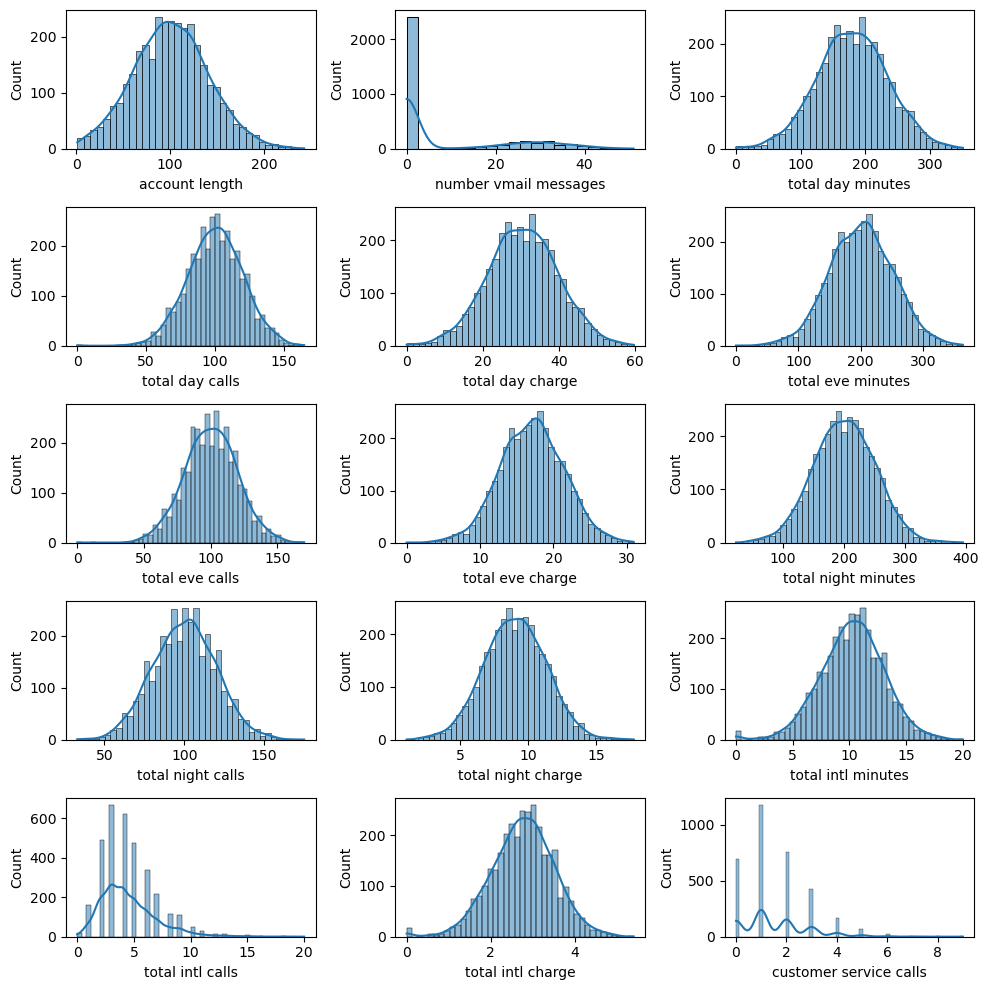

In [14]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Create subplots and plot numeric features
ncols = 3
nrows = (len(numeric_features) + ncols - 1) // ncols  # Calculate rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# # Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

For the distribution plots of the features above, all of them  have a norma distribution except:
* Customer service calls
* number of voicemail messages 
* Total international calls seems to be skewed to the right side however it is still normally distributed.
* Customer service calls has a few peaks, which indicates there are a few modes in the population.

##### 3.2.1.4 Distribution of the categorical features

There are 3 categorical Columns in the dataset that we shall be analysing: `state`,`international plan` and `voice mail plan`.

In [15]:
#Checking the distribution of categorical features
def plot_categorical_distribution(data, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=data,color='lightblue', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

* State

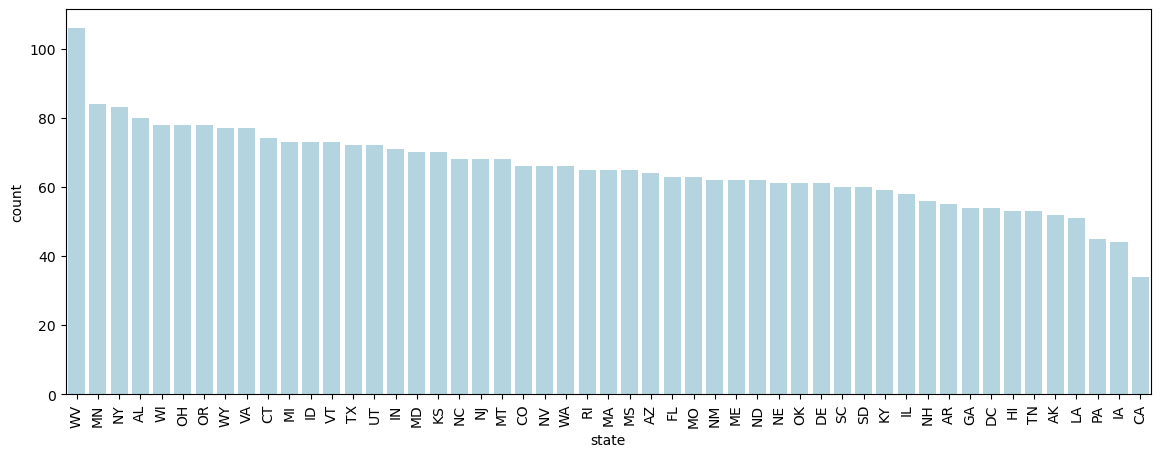

In [16]:
plot_categorical_distribution(data, 'state')

Most of the customers are from `West Virginia`,`Minnesota`,`NewYork`,`Alabama` and `Wisconsin`.

* International plan

In [17]:
data['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

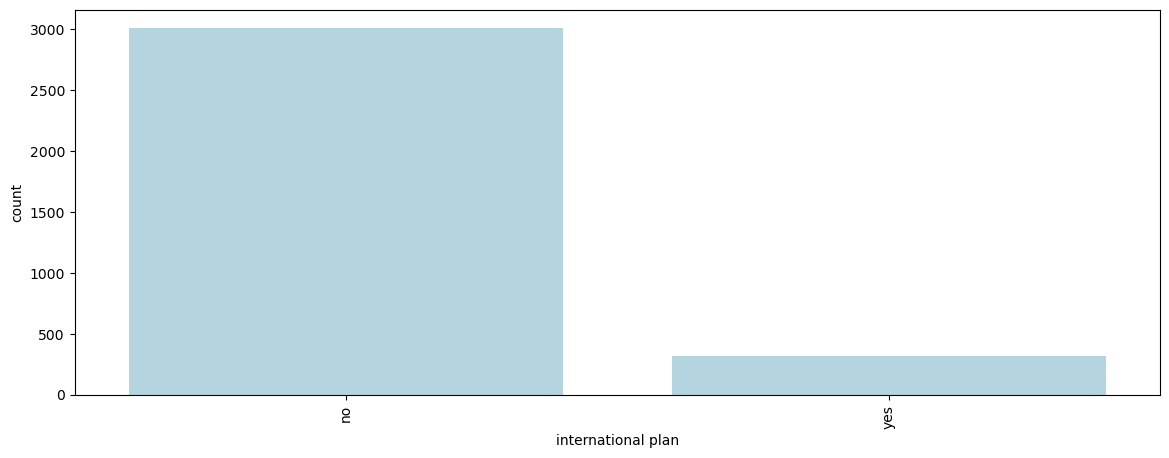

In [18]:
plot_categorical_distribution(data,'international plan')

Out of 3333 customers, only 323 of them have an international plan, that's about 0.1%.

* Voicemail plan

In [19]:
data['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

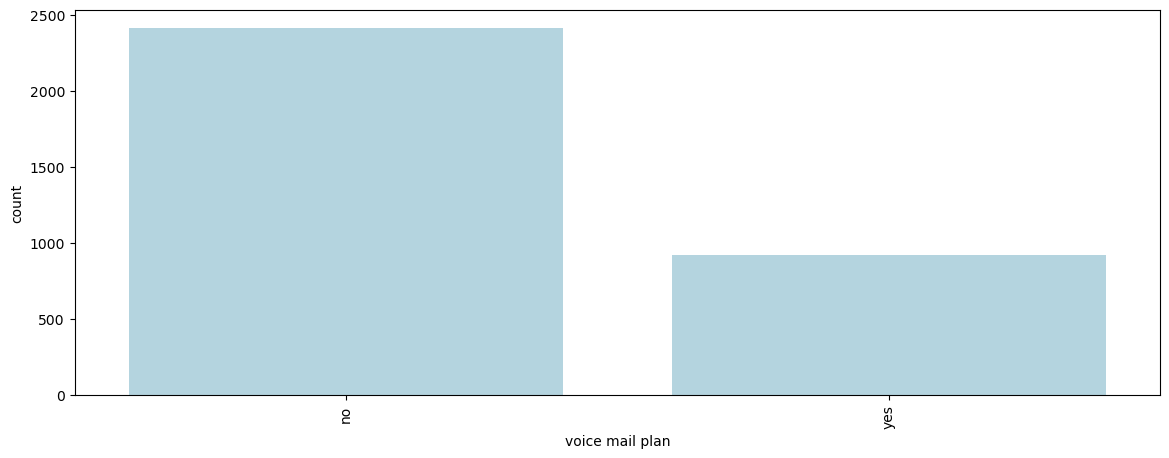

In [20]:
plot_categorical_distribution(data, 'voice mail plan')

Out of 3333 customers, only 922 customers have a voicemail plan, that's about 0.3%.

#### 3.2.2 Bivariate Analysis
> In this section,we explore the relationship or association between two variables in the dataset. It allows us to examine how changes in one variable are related to changes in another variable.

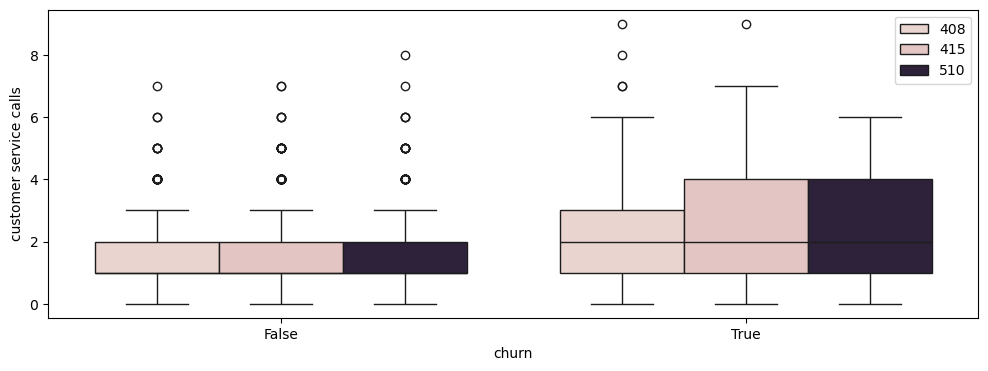

In [21]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(12,4))
sns.boxplot(data=data,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

Of the customers who have terminated their account, most of them are from area codes `415` and `510`. And it is clear that there are quite a number of outliers.

In [22]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution(data, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    churn_counts = data.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=data, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

* State

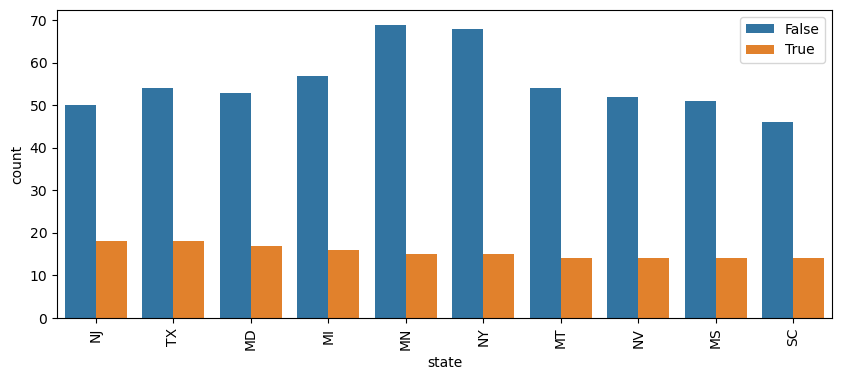

In [23]:
plot_categorical_distribution(data, 'state')

Of all the customers that churned, majority are from `Texas`, `New Jersey`, `Maryland`,`Miami` and `NewYork`.

* International plan

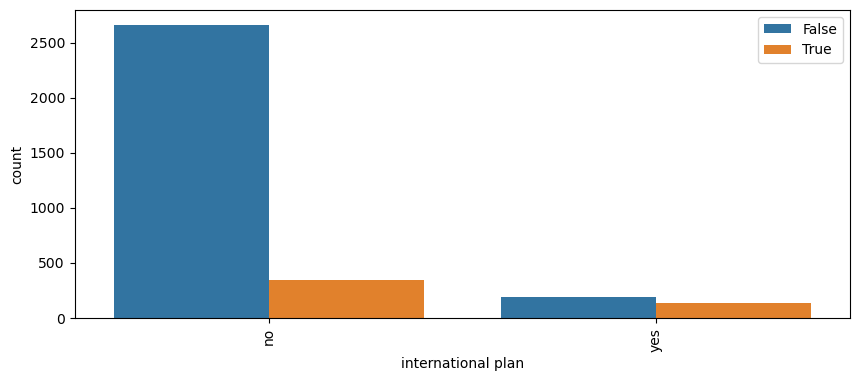

In [24]:
plot_categorical_distribution(data, 'international plan')

The majority of customers who churned did not have an international plan.

* Voice mail plan

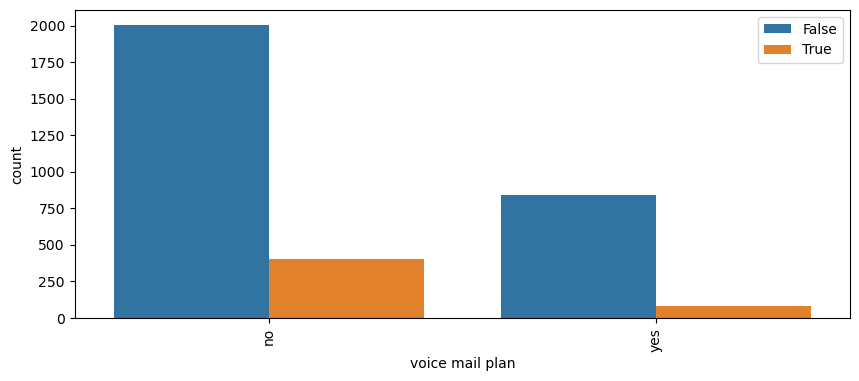

In [25]:
plot_categorical_distribution(data, 'voice mail plan')

The majority of customers who churned did not have an voicemail plan.

In [26]:
def plot_churn_kde(data, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

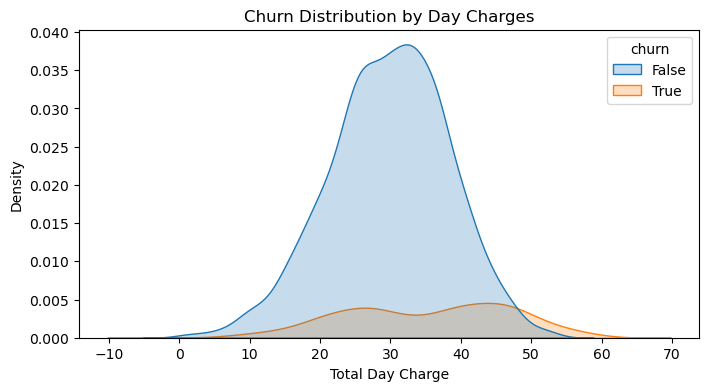

In [27]:
# Churn by day charges
plot_churn_kde(data, 'total day charge', 'Day')

The KDE plot for churn by day charges shows that customers who have terminated their accounts tend to have higher total day charges than customers who have not terminated their accounts. This suggests that customers who are unhappy with their service or who are finding it too expensive during the day may be more likely to churn.

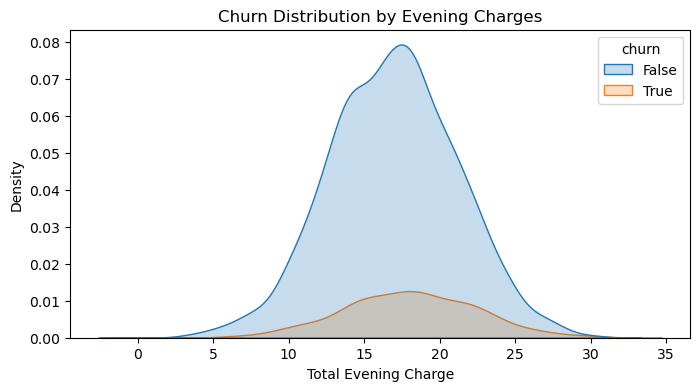

In [28]:
# Churn by evening charges
plot_churn_kde(data, 'total eve charge', 'Evening')

The KDE plot for churn by evening charges shows a similar pattern to the churn by day charges plot. Customers who have terminated their accounts tend to have higher total evening charges than customers who have not terminated their accounts. 

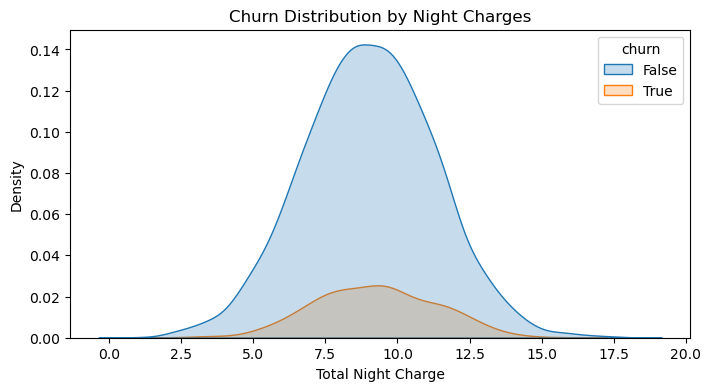

In [29]:
# Churn by night charges
plot_churn_kde(data, 'total night charge', 'Night')

The KDE plot for churn by night charges shows a similar pattern to the churn by day charges and churn by evening charges plots. Customers who have terminated their accounts tend to have higher total night charges than customers who have not terminated their accounts.

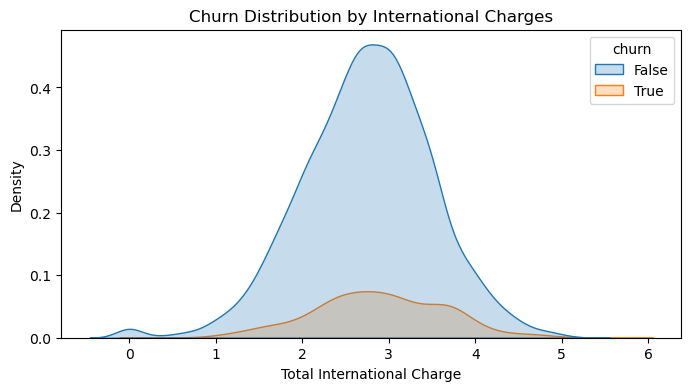

In [30]:
plot_churn_kde(data, 'total intl charge', 'International')

 The plot suggests that customers with higher total international charges have a slightly higher likelihood of churning.

#### 3.2.3 Dealing with Outliers

Outliers can disproportionately impact the performance of predictive models by introducing noise or skewing the training process. By excluding outliers beyond 3 standard deviations, we improve our models' ability to generalize patterns and make more accurate predictions on unseen data.

In [31]:
def drop_numerical_outliers(data, z_thresh=3):
    constrains = data.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    data.drop(data.index[~constrains], inplace=True)
    
drop_numerical_outliers(data)
print(data.shape)

(3169, 20)


#### 3.2.4 Features Correlation
Checking for features that have high correlation with the target(churn) variable

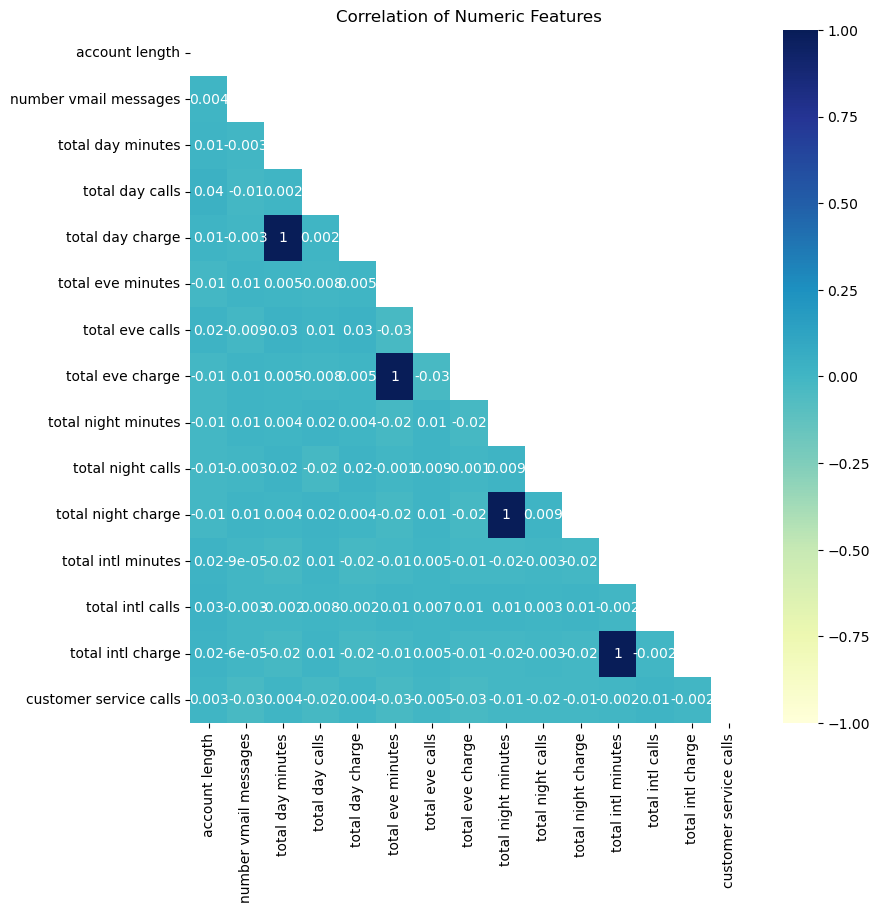

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def corrmatrix(data, figsize=(9, 9)):
    '''This function plots a correlation matrix for numeric columns in a given dataframe.'''
    plt.figure(figsize=figsize)

    # Select only numeric columns
    numeric_df = data.select_dtypes(include=['number'])
    
    # Calculate the correlation matrix
    corr = numeric_df.corr()

    # Generate a mask to only show the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Plot the heatmap
    sns.heatmap(corr, mask=mask, center=0, cmap="YlGnBu", annot=True, fmt='.1g', vmin=-1, vmax=1)
    plt.title('Correlation of Numeric Features')
    plt.show()

# Call the function
corrmatrix(data)



Most of the features are not correlated however some do share a perfect correlation.
* `Total day charge` and `total day minutes` features are fully positively correlated.
* `Total eve charge` and `total eve minutes` features are fully positively correlated.
* `Total night charge` and `total night minutes` features are fully positively correlated.
* `Total int charge` and `total int minutes` features are fully positively correlated.

It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.

#### 3.2.5 Multicollinearity check

To check for multicollinearity among features, the dataset was analyzed using correlation matrix,. Multicollinearity occurs when two or more features in the dataset are highly correlated with each other, which can cause issues during modeling such as instability, overfitting, or inaccurate coefficient estimates. We drop features that have a value more than 0.9.

In [33]:

import pandas as pd
import numpy as np

# Ensure only numeric columns are used
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix and take the absolute value
corr_matrix = numeric_data.corr().abs()

# Create a True/False mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features from the original DataFrame
data = data.drop(to_drop, axis=1)

print(f"Columns dropped due to high correlation: {to_drop}")


Columns dropped due to high correlation: ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']


### 3.3 Feature Engineering
>  The process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. In this phase, we'll perform Label Encoding, One Hot Encoding and Scaling the data.

##### 3.3.1 Label Encoding

It is a technique used to convert categorical variables into numerical values. This is done by assigning a unique integer to each category. 

In [34]:
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])
data['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3169, dtype: int64

##### 3.3.2 One Hot Encoding

This is a technique used to convert categorical variables into a set of binary features. This is done by creating a new feature for each category, and then assigning a value of 1 to the feature if the category is present and 0 if it is not.

In [35]:
data = pd.get_dummies(data,columns = ['state', 'area code','international plan','voice mail plan'])
data.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,False,False,False,False,True,False,True,False,False,True
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,False,False,False,False,True,False,True,False,False,True
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,False,False,False,False,True,False,True,False,True,False
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,...,False,False,False,True,False,False,False,True,True,False
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,False,False,False,False,True,False,False,True,True,False


## 4. Modeling

> In this phase, we will build a model that can predict the customer churn based on the features in our dataset. The model will be evaluated on the recall score. Specifically, if it achieves an recall score of 80% or higher, it will be considered a success.

In order to achieve the targets stipulated in the project proposal, we will be using the following algorithms:
- Logistic Regression
- Decision Tree
- Random Forest

We will also be using the `ROC_AUC `metric to evaluate the performance of our models

To deal with class imbalance, we will be using `SMOTE` to generate synthetic examples of the minority class in our dataset

In [36]:
#Defining X and y
X = data.drop("churn", axis=1)
y = data["churn"]

#### Train-Test Split

Splitting data into train and test sets using a test_size of 0.25

In [37]:
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

#### Scaling the data
Scaling is a technique used to transform numerical features into a comparable range. It helps in reducing the impact of outliers and standardizing the variables. One common method of scaling is Min-Max Normalization, which scales the variable values to a specific range. In this process, the minimum value of the variable is transformed to 0, and the maximum value is transformed to 1, while the remaining values are scaled proportionally in between.

In [38]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(data[columns].values.reshape(-1,1))

for i in data.select_dtypes(include=[np.number]).columns:
    data[i] = scaling(i)
data.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.587963,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,0.487585,...,False,False,False,False,True,False,True,False,False,True
1,0.490741,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,0.713318,...,False,False,False,False,True,False,True,False,False,True
2,0.629630,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,0.620767,...,False,False,False,False,True,False,True,False,True,False
3,0.384259,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,0.279910,...,False,False,False,True,False,False,False,True,True,False
4,0.342593,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,0.494357,...,False,False,False,False,True,False,False,True,True,False


#### Applying SMOTE to Resolve Unbalanced 'churn' Feature
Synthetic Minority Oversampling Technique ("SMOTE") is an oversampling technique where synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [39]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

### 4.1 Logistic Regression

> Logistic regression is a statistical model used for binary classification tasks. It is a type of regression analysis where the dependent variable is binary. The goal of logistic regression is to estimate the probability of an instance belonging to a specific class based on the values of the independent variables.

In [40]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=123)
logreg

LogisticRegression(random_state=123)

In [41]:
# Fit the model on the training data 
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)
y_pred_log


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

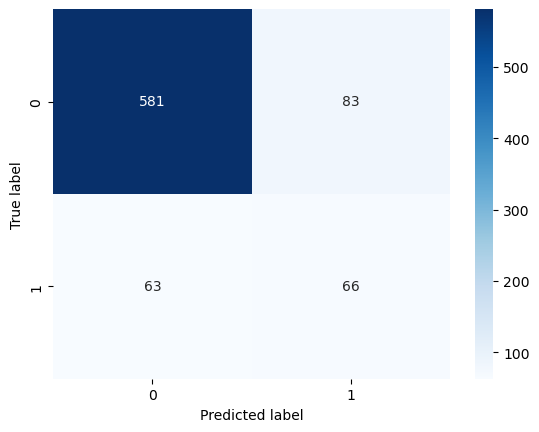

In [42]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [43]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       664
           1       0.44      0.51      0.47       129

    accuracy                           0.82       793
   macro avg       0.67      0.69      0.68       793
weighted avg       0.83      0.82      0.82       793



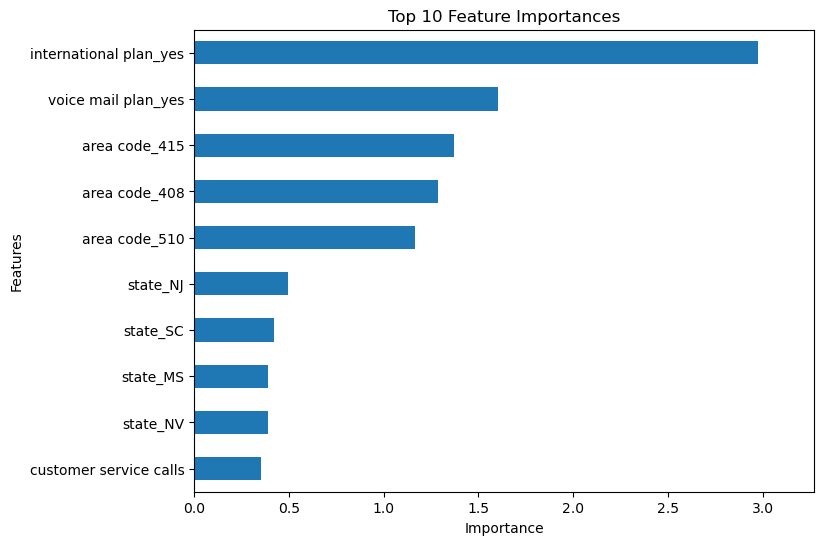

In [44]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()


The logistic regression model achieved a recall score of 0.51, which is a reasonable starting point for a baseline model. This indicates that the model correctly identifies approximately 51% of the actual positive instances.

An evaluation of the confusion matrix revealed that the model has a higher number of true positives and true negatives compared to false positives and false negatives. This suggests that the model is making correct predictions more often than incorrect ones and is not overfitting to the training data.

Additionally, the model identified total day charge, customer service calls, and total eve charge as the top three most important features contributing to its predictions.

### 4.2 Decision Tree Classifier

>It is a supervised machine learning algorithm that can be used to classify data. Decision trees work by splitting the data into smaller and smaller subsets until each subset contains only data of a single class. The decision tree then predicts the class of a new data point by following the path down the tree that corresponds to the values of its features.

In [45]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=123)

In [46]:
#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

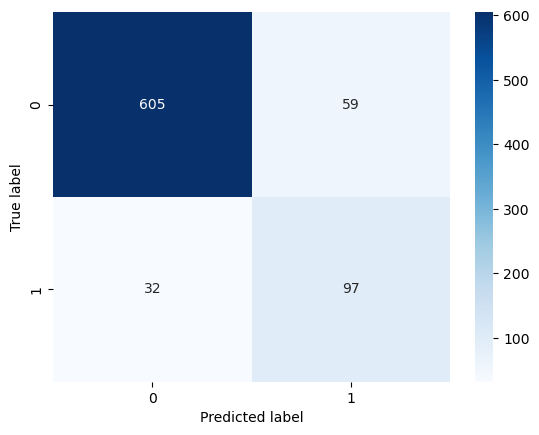

In [47]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [48]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       664
           1       0.62      0.75      0.68       129

    accuracy                           0.89       793
   macro avg       0.79      0.83      0.81       793
weighted avg       0.90      0.89      0.89       793



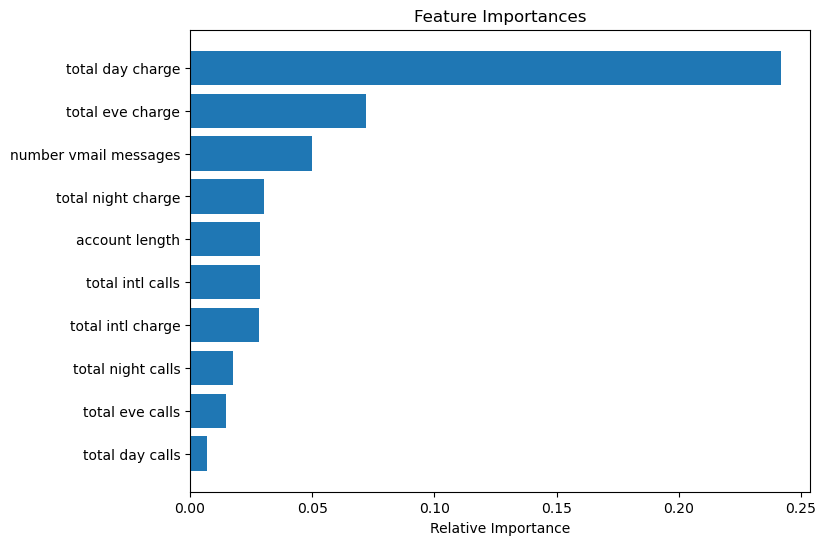

In [49]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The Decision Tre classifier model has a recall score of 0.75. This means that the model can identify around 75% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.  

According to the model, `total day charge`, `total intl calls`, `total eve charge` are the top three most important features.

### 4.3 Random Forest Classifier

>It is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting a class prediction or regression value by averaging the predictions of the individual trees.

In [50]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [51]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)

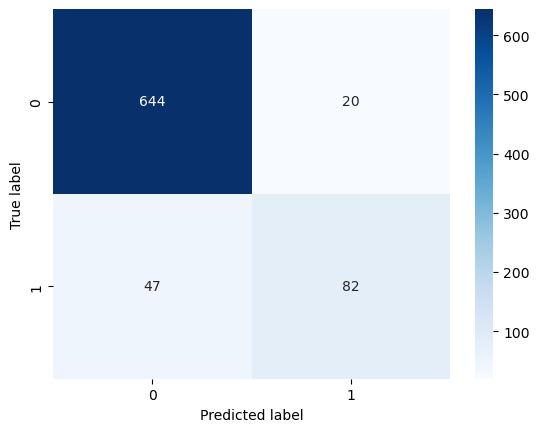

In [52]:
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [53]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       664
           1       0.80      0.64      0.71       129

    accuracy                           0.92       793
   macro avg       0.87      0.80      0.83       793
weighted avg       0.91      0.92      0.91       793



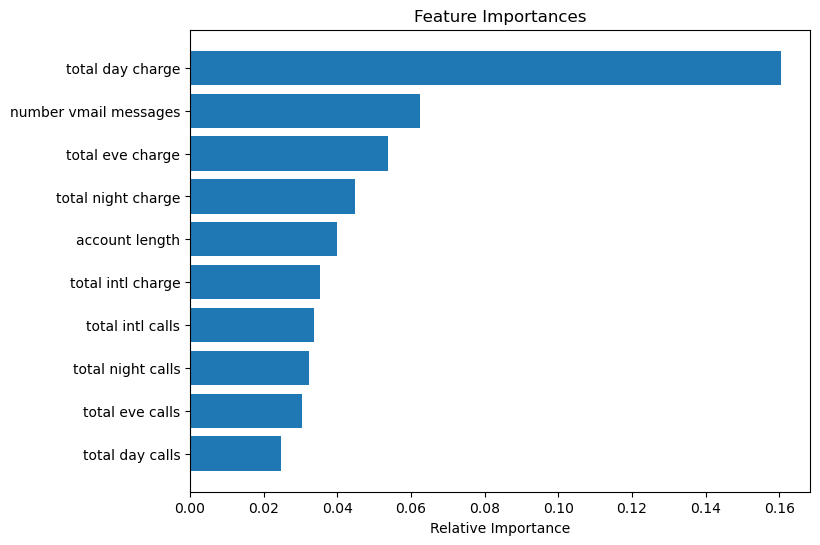

In [54]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model has a recall score of 0.64. This means that the model can identify around 64% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.  

According to the model, `total day charge`, `total intl calls`, `total eve charge` are the top three most important features.

## 5. Model Evaluation
> In this phase, we'll evaluate models based on recall score and ROC_AUC. After, we will the best two models to tune them for better perfomance.

### 5.1 Models Comparison - Recall Score

The recall score is a measure of how many of the positive instances the model correctly identifies. A higher recall score indicates that the model is better at identifying positive instances. 

In [55]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Set random seed for reproducibility
np.random.seed(123)

# List of classifiers
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Define an empty result table with the required columns
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    # Use pd.concat() to append results
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__], 'recall': [recall]})], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table


,recall
classifiers,
LogisticRegression,0.511628
RandomForestClassifier,0.635659
DecisionTreeClassifier,0.759690


The results table shows that the DecisionForestClassifier has the highest recall score, followed by RandomForestClassifier and,  LogisticRegression.The LogisticRegression has the lowest recall score of 0.511628

### 5.2 Models Comparison - ROC Curve 

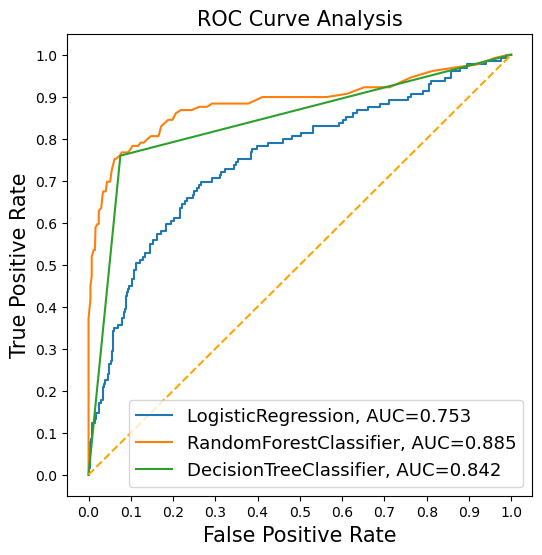

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Set seed
np.random.seed(123)

# Define classifiers
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    # Train model
    model = cls.fit(resampled_X_train, resampled_y_train)
    # Predict probabilities
    yproba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    # Add results to the table using pd.concat
    new_row = pd.DataFrame({
        'classifiers': [cls.__class__.__name__],
        'fpr': [fpr],
        'tpr': [tpr],
        'auc': [auc]
    })
    result_table = pd.concat([result_table, new_row], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot ROC curves
fig = plt.figure(figsize=(6, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')  # Diagonal line for reference

# Plot labels and ticks
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

# Show the plot
plt.show()


The ROC curve analysis shows that the RandomForestClassifier has the best performance, followed by the DecisionTreeClassifier, and LogisticRegression. The  RandomForestClassifier has the highest AUC score of 0.885, while the LogisticRegression has the lowest AUC score of 0.753.

The ROC curve is a graphical plot that shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for a binary classifier. The TPR is the proportion of positive instances that are correctly classified, while the FPR is the proportion of negative instances that are incorrectly classified. The AUC is the area under the ROC curve, and it is a measure of the overall performance of the classifier.

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances.

### 5.3 Model Tuning

Based on the evaluation of the models using recall scores and ROC AUC, it is observed that theRandomForest classifier and the DecisionTree classifier have shown promising performance. To further improve their performance, model tuning can be performed using GridSearch.

####  5.3.1Tuning RandomForest

In [57]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 

#Define the hyperparameter grid
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy','gini']
    }
# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state = 123)
# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

#Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train,resampled_y_train)

#print the best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [58]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

In [59]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

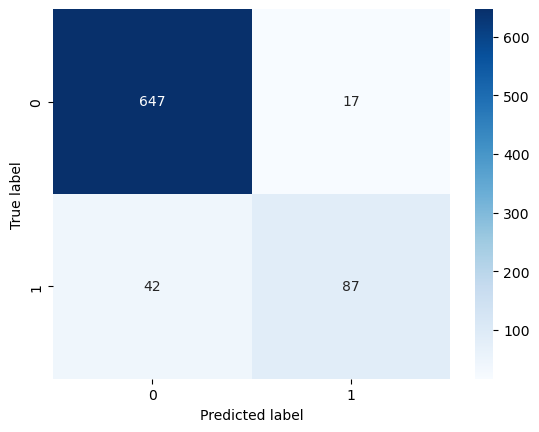

In [60]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [61]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       664
           1       0.84      0.67      0.75       129

    accuracy                           0.93       793
   macro avg       0.89      0.82      0.85       793
weighted avg       0.92      0.93      0.92       793



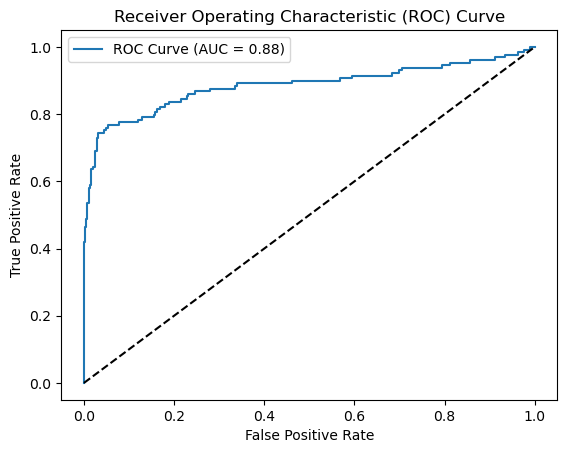

In [62]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### 5.3.2 Tuning Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 5],     # Minimum number of samples per leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
}

# Create an instance of DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=123)

# Create GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='recall', n_jobs=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [64]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTree classifier with best params
dt_tuned = DecisionTreeClassifier(criterion='entropy',   # Splitting criterion
                                  max_depth=20,         # Maximum depth of the tree
                                  min_samples_split=5,  # Minimum samples to split a node
                                  random_state=123)

# Fit the model on the training data
dt_tuned.fit(resampled_X_train, resampled_y_train)

# Print confirmation
print("Decision Tree model successfully trained!")


Decision Tree model successfully trained!


In [65]:
#Predict on the test data
y_pred_tuned = dt_tuned.predict(X_test)

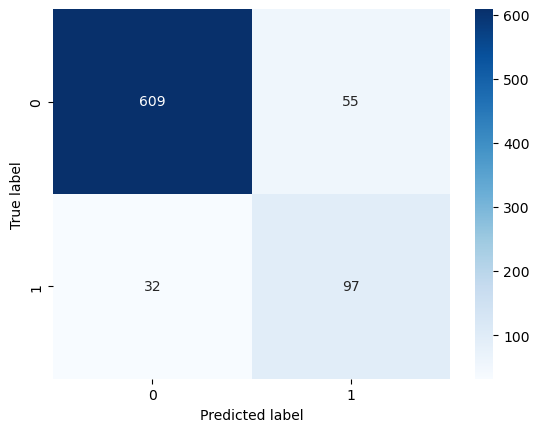

In [66]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [67]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       664
           1       0.64      0.75      0.69       129

    accuracy                           0.89       793
   macro avg       0.79      0.83      0.81       793
weighted avg       0.90      0.89      0.89       793



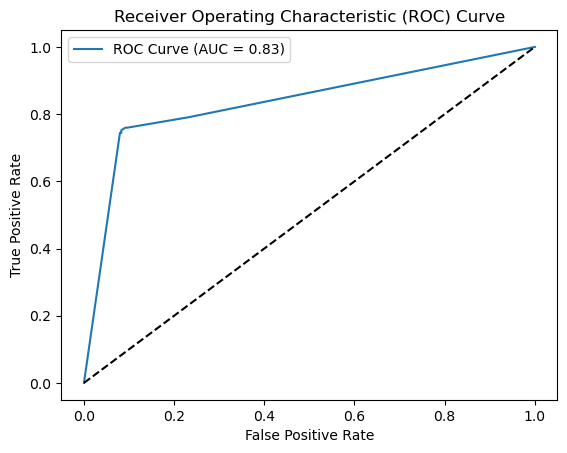

In [68]:
# Get the predicted probabilities for the positive class
y_proba = dt_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Based on the ROC curve and the recall metric, the tuned Decision Tree model performs well in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.75, which means model is able to capture 75% of the actual churned customers.

## 6. Conclusion.

The recall score of our DecisionTree was 75%. While this is still a good predictive model, we would like to undertake further feature engineering to boost this recall score if we had more time. We achieved our objectives to be able to predict customer churn and had an acceptable recall score. 

### Recommendations 

* Target High-Churn Areas with Incentives:   Offer discounts or promotional deals to customers in area codes 415 and 510, which have shown higher churn rates. 
  These incentives can help retain customers by encouraging them to stay with the company.

* Enhance Customer Service Quality:   Improve training programs for customer service representatives to ensure prompt, effective issue resolution. 
  Reducing the frequency of customer service calls and enhancing support quality can increase customer satisfaction and lower churn rates.

* Reevaluate Pricing Structures:   Review the pricing for day, evening, night, and international calls. 
  Adjust plans or introduce discounted packages to better align with customer needs and address cost concerns that may contribute to churn.

* Focus on High-Churn States:   Implement targeted retention strategies in states with elevated churn rates, such as Texas, New Jersey, Maryland, Miami, and New York. 
  These strategies could include personalized marketing campaigns, tailored offers, or enhanced customer support specific to regional needs.

* Promote Voicemail Plan Adoption:   Improve the value proposition of voicemail services by highlighting their convenience and benefits. 
  Consider offering additional features, bundled packages, or discounts to encourage more customers to subscribe.